# Uitwerkingen opgaven data-analyse

## Opgave 1.3

We maken hier gebruik van de error function, gedefinieerd in `scipy.special.erf`. Er is ook een complementaire error function, gedefinieerd als $\mathrm{erfc} = 1 - \mathrm{erf}$. Vergeet niet de factor $\sqrt{2}$, aangezien $\mathrm{erf}$ een vereenvoudigde functie is, en het argument nog omgerekend moet worden.

De waarschijnlijkheid dat een waarde méér dan $1.23\sigma$ van het gemiddelde afligt is gegeven door:

In [1]:
from math import sqrt
from scipy.special import erf, erfc

In [2]:
erfc(1.23 / sqrt(2))

0.21869710485138394

De waarschijnlijkheid dat een waarde méér dan $2.43\sigma$ *boven* het gemiddelde ligt is gegeven door:

In [3]:
erfc(2.43 / sqrt(2)) / 2

0.0075494114163092065

De waarschijnlijkheid dat een waarde meer dan $0.5\sigma$, maar minder dan $1.5\sigma$ van het gemiddelde verwijderd is, wordt gegeven door:

In [4]:
erf(1.5 / sqrt(2)) - erf(.5 / sqrt(2))

0.4834606749142577

We willen weten binnen hoeveel standaarddeviaties van het gemiddelde de waarschijnlijkheid dat een waarde gevonden wordt gelijk is aan $50\,\%$. Gebruik hiervoor de inverse error function `erfinv`. Vergeet de factor $\sqrt{2}$ niet!

In [5]:
from scipy.special import erfinv

In [6]:
erfinv(.5) * sqrt(2)

0.6744897501960817

## Opgave 1.4

We maken gebruik van pandas, een python data-analyse pakket. We importeren de datafile:

In [7]:
import pandas as pd

In [8]:
data = pd.read_csv('10-metingen.txt')

In [9]:
print(data)

    x
0  73
1  79
2  69
3  74
4  68
5  72
6  72
7  75
8  60
9  76


...en bekijken wat statistieken:

In [10]:
data.describe()

,x
count,10.000000
mean,71.800000
std,5.245104
min,60.000000
25%,69.750000
50%,72.500000
75%,74.750000
max,79.000000


De standaarddeviatie van het gemiddelde is:

In [11]:
x = data.x
x.std() / sqrt(x.count())

1.6586473739499634

Het resultaat van ons experiment is dus $x = 71.8 \pm 1.7$ of $x = 71.8(17)$.

Voor De kans op een volgende meting met $x\geq 75$ berekenen we eerst hoeveel standaarddeviaties de meting verwijderd is van het gemiddelde. Vervolgens berekenen we de kans op een meting hóger dan dat aantal standaarddeviaties:

In [12]:
dist = 75 - x.mean()
dist_sigma = dist / x.std()
erfc(dist_sigma / sqrt(2)) / 2

0.27090016180692866

## Opgave 1.5

We gaan plotten, en we moeten `matplotlib` vertellen dat we de plots in de notebook willen zien:

In [13]:
%matplotlib inline

We openen de datafile en maken een histogram van $y$:

In [14]:
data = pd.read_csv('80-metingen.txt')
data.describe()

,y
count,80.000000
mean,61.587500
std,16.779051
min,22.000000
25%,49.000000
50%,63.500000
75%,75.000000
max,91.000000


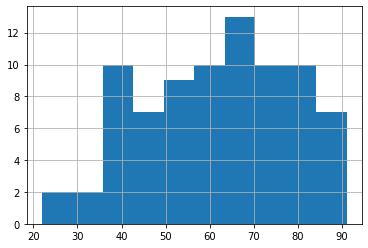

In [15]:
data.y.hist()

Het is best interessant dat dit histogram er heel anders uitziet dan het antwoord uit de uitwerkingen. Dat histogram is gemaakt met Origin, en dat lijkt standaard iets beter op zoek te gaan naar aardige bingrenzen. Niet simpelweg het minimum en het maximum nemen en opdelen, maar afronden op mooie, ronde getallen. Handmatig kan dat in Python. Voor stapgroottes kun je het beste `arange` gebruiken. Let er daarbij wel op dat `arange` niet inclusief is. Het maximum wordt niet meegenomen. Als je dat ietsje groter maakt dan de bingrens, dus 101 i.p.v. 100, dan komt het goed:

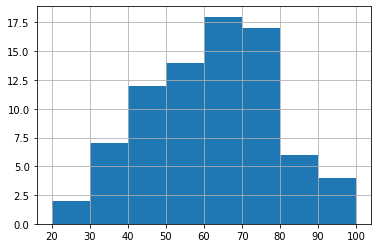

In [16]:
import numpy as np
bins = np.arange(20, 101, 10)
data.y.hist(bins=bins)

### Methode A: fitten aan volledige dataset

Het fitten van een bekende distributie (zie `scipy.stats`) aan de data gaat vrij eenvoudig. Daar heb je niet eens een histogram voor nodig:

In [17]:
from scipy import stats
mean, sigma = stats.norm.fit(data.y)
mean, sigma

(61.5875, 16.673852096921095)

De meest waarschijnlijke distributie heeft een gemiddelde van 61.6 en een standaarddeviatie van 16.7. Je krijgt alleen de distributie, genormeerd, dus als je dat samen met het histogram wilt plotten moet je eerst nog schalen met een factor $N^2 / N_\mathrm{bins}$:

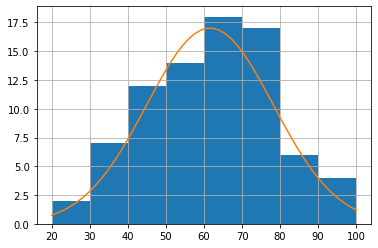

In [18]:
import matplotlib.pyplot as plt

data.y.hist(bins=bins)

scale = data.y.count() ** 2 / len(bins - 1)
x = np.linspace(20, 100, 50)
plt.plot(x, scale * stats.norm.pdf(x, mean, sigma))

Het is dan wellicht interessanter om het histogram weer te geven als waardes met foutenvlaggen. Eerst wil je de waardes van het histogram, zonder te plotten. Dan moet je de middens van de bins berekenen, en dat plotten met de fouten $\sqrt{N}$:

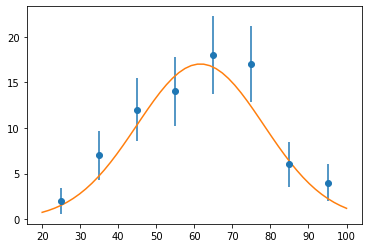

In [19]:
n, _ = np.histogram(data.y, bins=bins)
xbins = (bins[:-1] + bins[1:]) / 2
plt.errorbar(xbins, n, yerr=np.sqrt(n), fmt='o')

plt.plot(x, scale * stats.norm.pdf(x, mean, sigma))

Merk op dat de waardes van de fit iets verschillen van die van Origin, helaas. De volledige code om het laatste plaatje te maken wordt dan:

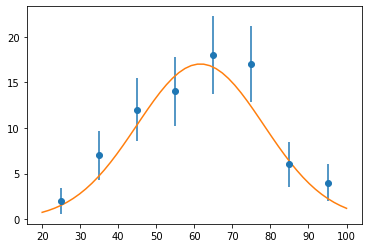

In [20]:
# imports
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# read datafile
data = pd.read_csv('80-metingen.txt')

# calculate histogram
bins = np.arange(20, 101, 10)
n, _ = np.histogram(data.y, bins=bins)

# plot histogram with bin centers and error bars
xbins = (bins[:-1] + bins[1:]) / 2
plt.errorbar(xbins, n, yerr=np.sqrt(n), fmt='o')

# fit normal distribution to data
mean, sigma = stats.norm.fit(data.y)

# plot the scaled distribution
scale = data.y.count() ** 2 / len(bins - 1)
x = np.linspace(20, 100, 50)
plt.plot(x, scale * stats.norm.pdf(x, mean, sigma))

We vertrouwen de data wel. De fit gaat door of vlak langs alle foutenvlaggen.

Dit is wel meer werk dan in Origin, vooral als je nog niet zo handig bent. Zeker ook meer om te onthouden. **Merk op dat de fit gedaan is op de volledige set waarnemingen, dus niet op het histogram. Als er gefit moet worden aan een histogram, of als je een zelf-gedefinieerde functie wilt fitten, dan moet je overstappen naar least-squares fitting.**

### Methode B: fitten aan een histogram

Als je least-squares wilt fitten, gebruik dan de `lmfit` bibliotheek. Die is handiger dan `scipy` gebruiken.

In [21]:
from lmfit import models

Je kunt veel verschillende modellen gebruiken, b.v. een `GaussianModel`. De werkwijze is als volgt: éérst initialiseer je het model en vervolgens voer je de fit uit. Het is handig om voor de fit een *first guess* op te geven, een afschatting van de parameters. Je kunt dit handmatig doen, maar wij gebruiken hier de method `guess` van het model. Dit geeft een afschatting van de parameters...

In [22]:
gauss = models.GaussianModel()
first_guess = gauss.guess(n, x=xbins)
first_guess.pretty_print()

Name          Value      Min      Max   Stderr     Vary     Expr Brute_Step
amplitude       720     -inf      inf     None     True     None     None
center           60     -inf      inf     None     True     None     None
fwhm          35.32     -inf      inf     None    False 2.3548200*sigma     None
height        19.15     -inf      inf     None    False 0.3989423*amplitude/max(2.220446049250313e-16, sigma)     None
sigma            15        0      inf     None     True     None     None


...die je vervolgens in de fit kunt stoppen. Denk hierbij aan de fout op de datapunten. In de fit kun je een *gewicht* toekennen, dat omgekeerd evenredig is met de fout.

In [23]:
fit = gauss.fit(n, x=xbins, weights=1 / np.sqrt(n), params=first_guess)
print(fit.fit_report())

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 13
    # data points      = 8
    # variables        = 3
    chi-square         = 2.02223322
    reduced chi-square = 0.40444664
    Akaike info crit   = -5.00191267
    Bayesian info crit = -4.76358805
[[Variables]]
    amplitude:  801.690915 +/- 58.4759654 (7.29%) (init = 720)
    center:     61.8208268 +/- 1.43858876 (2.33%) (init = 60)
    sigma:      18.2635376 +/- 1.29580916 (7.10%) (init = 15)
    fwhm:       43.0073437 +/- 3.05139733 (7.10%) == '2.3548200*sigma'
    height:     17.5118547 +/- 1.63561642 (9.34%) == '0.3989423*amplitude/max(2.220446049250313e-16, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) =  0.158


(<Figure size 432x432 with 2 Axes>, GridSpec(2, 1, height_ratios=[1, 4]))

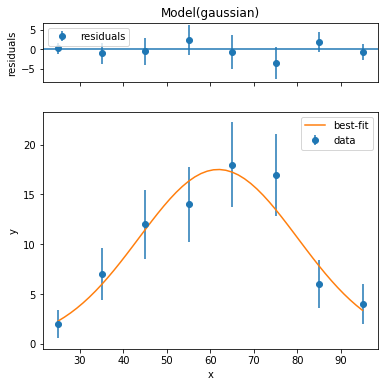

In [24]:
fit.plot(numpoints=50)

### Vergelijking van de methodes A en B

Je kunt je nu afvragen welke methode beter is. Bovenstaande fit ziet er prachtig uit. Toch is er nog een subtiliteit: het histogram hangt nogal af van de keuze voor de bins. In bovenstaand voorbeeld hadden we de bins zelf gekozen. Een andere keuze voor de bins, levert een andere fit op:

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 17
    # data points      = 10
    # variables        = 3
    chi-square         = 3.57114692
    reduced chi-square = 0.51016385
    Akaike info crit   = -4.29698282
    Bayesian info crit = -3.38922754
[[Variables]]
    amplitude:  614.217856 +/- 64.7832820 (10.55%) (init = 683.1)
    center:     66.6602261 +/- 2.83603715 (4.25%) (init = 62.25)
    sigma:      21.1889216 +/- 2.66697273 (12.59%) (init = 20.7)
    fwhm:       49.8960965 +/- 6.28024073 (12.59%) == '2.3548200*sigma'
    height:     11.5644150 +/- 1.21180051 (10.48%) == '0.3989423*amplitude/max(2.220446049250313e-16, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma)  =  0.602
    C(center, sigma)     =  0.598
    C(amplitude, center) =  0.515


(<Figure size 432x432 with 2 Axes>, GridSpec(2, 1, height_ratios=[1, 4]))

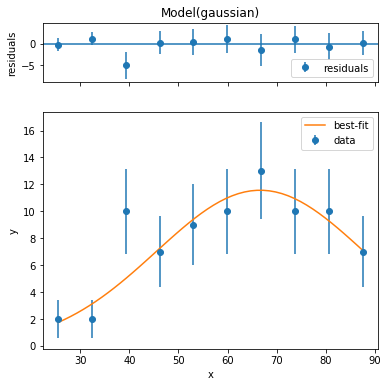

In [25]:
n, bins = np.histogram(data.y)
xbins = (bins[:-1] + bins[1:]) / 2

first_guess = gauss.guess(n, x=xbins)
fit = gauss.fit(n, x=xbins, weights=1 / np.sqrt(n), params=first_guess)
print(fit.fit_report())
fit.plot(numpoints=50)

Deze fit heeft een iets ander centrum, een andere breedte, en een fors lagere amplitude.

## Opgave 1.6

We importeren de dataset en kijken even of dat goed ging.

In [26]:
data = pd.read_csv('verval.txt')

In [27]:
data.describe()

,tijd,counts
count,9.000000,9.000000
mean,4.000000,325.444444
std,2.738613,414.731573
min,0.000000,29.000000
25%,2.000000,41.000000
50%,4.000000,132.000000
75%,6.000000,410.000000
max,8.000000,1265.000000


We zien een kolom **tijd** en een kolom **counts**, met negen meetpunten. De fouten op de meetpunten stonden niet in het bestand, maar wel in de opgave. De fout op het aantal counts $N$ wordt gegeven door $\sqrt N$. We maken een nieuwe kolom `yerr` als volgt:

In [28]:
data['yerr'] = np.sqrt(data.counts)

Merk op dat we de data nu kunnen bekijken door zowel `data['yerr']` als `data.yerr` te typen, maar dat we nieuwe kolommen alléén kunnen maken met de `data['yerr']`-notatie. We inspecteren even de eerste vijf regels om te zien of alles goed ging:

In [29]:
data.head()

,tijd,counts,yerr
0,0,1265,35.566838
1,1,688,26.229754
2,2,410,20.248457
3,3,241,15.524175
4,4,132,11.489125


We maken een plot van counts tegen tijd, met de juiste foutvlaggen:

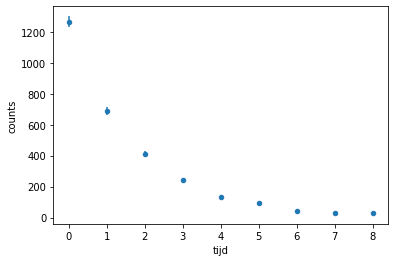

In [30]:
data.plot.scatter('tijd', 'counts', yerr='yerr')

De vraag is nu hoe we het beste om kunnen gaan met de achtergrond. Eenvoudig negeren, fitten aan een exponentiële functie plus een constante achtergrond of de achtergrond éérst aftrekken van de data? We bekijken hieronder de drie methodes.

### Methode A: negeren van de achtergrond

[[Model]]
    Model(exponential)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 48
    # data points      = 9
    # variables        = 2
    chi-square         = 11.6138776
    reduced chi-square = 1.65912536
    Akaike info crit   = 6.29478532
    Bayesian info crit = 6.68923447
[[Variables]]
    amplitude:  1232.13319 +/- 38.0342535 (3.09%) (init = 1)
    decay:      1.84065110 +/- 0.05040337 (2.74%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, decay) = -0.635


(<Figure size 432x432 with 2 Axes>, GridSpec(2, 1, height_ratios=[1, 4]))

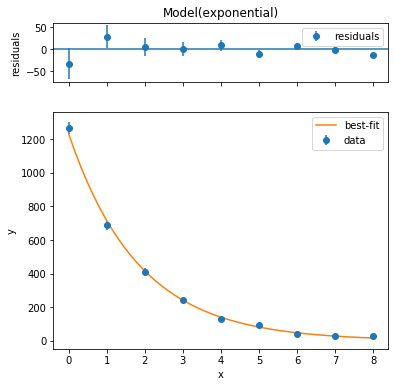

In [31]:
model = models.ExponentialModel()
fit = model.fit(data.counts, x=data.tijd, weights=1 / data.yerr)
print(fit.fit_report())
fit.plot(numpoints=50)

Op het oog ziet dit er prima uit, maar $\chi_\mathrm{red}^2 = 1.659$, vrij groot. Aan de residuals is nog niet heel veel te zien. Je moet langer doormeten om duidelijk te kunnen zien dat de exponentiële functie naar nul gaat, terwijl de metingen dat niet doen.

### Methode B: fitten aan exponentiële functie plus constante achtergrond

We kunnen met `lmfit` eenvoudig modellen optellen:

In [32]:
model = models.ExponentialModel() + models.ConstantModel()

Vervolgens fitten we dit model aan de data en bekijken het resultaat:

[[Model]]
    (Model(exponential) + Model(constant))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 76
    # data points      = 9
    # variables        = 3
    chi-square         = 7.00035413
    reduced chi-square = 1.16672569
    Akaike info crit   = 3.73862544
    Bayesian info crit = 4.33029918
[[Variables]]
    amplitude:  1244.05587 +/- 33.0431890 (2.66%) (init = 1)
    decay:      1.73323436 +/- 0.06537102 (3.77%) (init = 1)
    c:          11.1130703 +/- 5.38179988 (48.43%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(decay, c)         = -0.767
    C(amplitude, decay) = -0.513
    C(amplitude, c)     =  0.159


(<Figure size 432x432 with 2 Axes>, GridSpec(2, 1, height_ratios=[1, 4]))

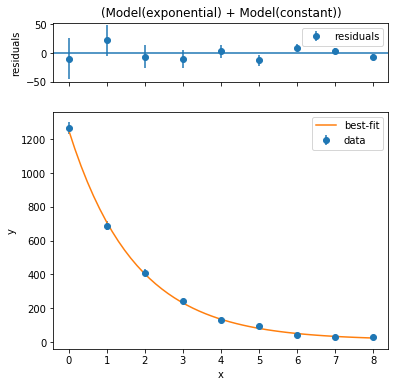

In [33]:
fit = model.fit(data.counts, x=data.tijd, weights=1 / data.yerr)
print(fit.fit_report())
fit.plot(numpoints=50)

Dat is een mooi resultaat. Op het oog gaat de fit goed door de punten en $\chi^2_\mathrm{red} = 1.167$. Dit resultaat is waarschijnlijker dan het resultaat van methode A, waar we de achtergrond negeren.

### Methode C: Achtergrond van de data aftrekken

Uit de opgave weten we dat er wel degelijk een achtergrond is, en dat die bepaald is op gemiddeld 12 counts per minuut. We kunnen een nieuwe kolom maken:

In [34]:
data['nobkg'] = data.counts - 12

De vraag is nu: wat doen we met de fout op deze data? Gebruiken we dezelfde fout als eerst? Maar dat was de wortel van het aantal counts mét achtergrond. De wortel van het aantal counts zónder achtergrond, dus `sqrt(data.nobkg)`, ligt voor de hand maar is niet juist. Niet elke meting had immers precies 12 counts aan achtergrond. We trekken 12 counts af, maar de verwachte onzekerheid op het *meten* van de achtergrond is $\sqrt{12}$. Dat telt mee.

We moeten de regels voor de foutenberekening aanroepen: $N_\mathrm{nobkg} = N - N_\mathrm{bkg}$. Dus de onzekerheid wordt gegeven door $\delta N_\mathrm{nobkg} = \sqrt{(\delta N)^2 + (\delta N_\mathrm{bkg})^2}$. De onzekerheid wordt, na aftrekken van de achtergrond, dus eigenlijk zelfs *groter*. Nu was de achtergrond gelukkig heel nauwkeurig bepaald, dus de onzekerheid op de grootte van de achtergrond is verwaarloosbaar klein. Dat betekent dat $\delta N_\mathrm{nobkg} = \delta N = \sqrt{N}$. We houden dus de oorspronkelijke onzekerheid.

[[Model]]
    Model(exponential)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 44
    # data points      = 9
    # variables        = 2
    chi-square         = 7.03239607
    reduced chi-square = 1.00462801
    Akaike info crit   = 1.77972615
    Bayesian info crit = 2.17417530
[[Variables]]
    amplitude:  1244.90162 +/- 30.3226131 (2.44%) (init = 1)
    decay:      1.72502723 +/- 0.03890322 (2.26%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, decay) = -0.615


(<Figure size 432x432 with 2 Axes>, GridSpec(2, 1, height_ratios=[1, 4]))

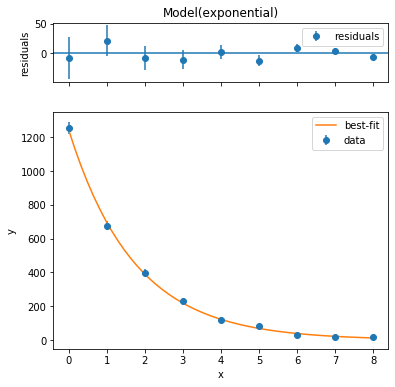

In [35]:
model = models.ExponentialModel()
fit = model.fit(data.nobkg, x=data.tijd, weights=1 / data.yerr)
print(fit.fit_report())
fit.plot(numpoints=50)

De $\chi_\mathrm{red}^2 = 1.005$. Dit is dus de meest nauwkeurige methode om de halfwaardetijd te bepalen. De halfwaardetijd wordt gegeven door $t_{1/2} = \lambda\ln 2$.

In [36]:
fit.params['decay'].value * np.log(2)

1.1956977620505684

Dus $t_{1/2} = 1.196$ s. Het kan makkelijker zijn om een eigen model te maken, waar $t_{1/2}$ expliciet in voorkomt: $N(t) = N_0 \cdot \frac{1}{2}^{t/t_{1/2}}$.

In [37]:
verval = models.Model(lambda t, N0, thalf: N0 * .5 ** (t / thalf))

Meestal moeten we een schatting opgeven van de parameters. Zonder die schatting is het goed mogelijk dat het fit-algoritme zoekt bij zulke onrealistische waardes dat er 'oneindig' uit de functie komt. Daarn kan het algoritme niet goed mee omgaan. We kiezen gewoon de waarde 1 voor beide parameters:

In [38]:
guess = verval.make_params(N0=1, thalf=1)

[[Model]]
    Model(<lambda>)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 41
    # data points      = 9
    # variables        = 2
    chi-square         = 7.03239607
    reduced chi-square = 1.00462801
    Akaike info crit   = 1.77972615
    Bayesian info crit = 2.17417530
[[Variables]]
    N0:     1244.90165 +/- 30.3225581 (2.44%) (init = 1)
    thalf:  1.19569771 +/- 0.02696573 (2.26%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(N0, thalf) = -0.615


(<Figure size 432x432 with 2 Axes>, GridSpec(2, 1, height_ratios=[1, 4]))

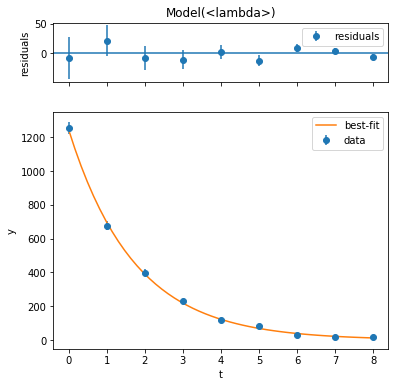

In [39]:
fit = verval.fit(data.nobkg, t=data.tijd, weights=1 / data.yerr, params=guess)
print(fit.fit_report())
fit.plot(numpoints=50)

En we lezen nu meteen af dat $t_{1/2} = 1.196 \pm 0.027$ s, ofwel $t_{1/2} = 1.196(27)$ s.

## Opgave 1.7

We lezen de data in en zetten de fout op $t$ gelijk aan 0.01.

In [40]:
data = pd.read_csv('valproef.txt')
data['terr'] = 0.01
data.head()

,d,t,terr
0,0.2,0.26,0.01
1,1.0,0.50,0.01
2,2.0,0.68,0.01
3,3.0,0.82,0.01
4,5.0,1.07,0.01


Normaliter zouden we eenvoudigweg de data fitten aan het bekende model $d = \frac{1}{2}gt^2$. Volgens de opgave moeten we echter een systematische fout op $t$ meenemen, omdat de magneet de kogel eventjes vasthoudt. Ons model wordt dan $d = \frac{1}{2}g(t - t_0)^2$.

In [41]:
vallen = models.Model(lambda t, g, t0: .5 * g * (t - t0) ** 2)
guess = vallen.make_params(g=1, t0=0)

In [42]:
fit = vallen.fit(data.d, t=data.t, params=guess)
print(fit.fit_report())

[[Model]]
    Model(<lambda>)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 19
    # data points      = 6
    # variables        = 2
    chi-square         = 0.01891279
    reduced chi-square = 0.00472820
    Akaike info crit   = -30.5580587
    Bayesian info crit = -30.9745397
[[Variables]]
    g:   9.63815653 +/- 0.19162521 (1.99%) (init = 1)
    t0:  0.04122806 +/- 0.01159351 (28.12%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(g, t0) =  0.956


Uit deze waarnemingen volgt $g = 9.64(19)$ m/s$^2$, en $t_0 = 0.041(11)$ s. De kogel wordt dus waarschijnlijk even vastgehouden, en de literatuurwaarde $g = 9.81$ m/s$^2$ valt nét binnen de grenzen van onze meting.

We hebben echter niet de fout op $t$ mee kunnen nemen. Alléén een fout op de $y$-as kunnen we meenemen in de fit. De gevonden waarde voor $\chi_\mathrm{red}^2$ zegt dus niet zoveel. Het heeft dus wellicht zin om de assen om te draaien. Daarbij moeten we wel ons model inverteren. Niet langer fitten we aan $d = \frac{1}{2}g(t - t_0)^2$, maar nu aan $t = \sqrt{\frac{2d}{g}} + t_0$.

In [43]:
inv_vallen = models.Model(lambda d, g, t0: np.sqrt(2 * d / g) + t0)

guess = inv_vallen.make_params(g=1, t0=0)
fit = inv_vallen.fit(data.t, d=data.d, weights = 1 / data.terr, params=guess)

[[Model]]
    Model(<lambda>)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 22
    # data points      = 6
    # variables        = 2
    chi-square         = 3.97119076
    reduced chi-square = 0.99279769
    Akaike info crit   = 1.52383911
    Bayesian info crit = 1.10735805
[[Variables]]
    g:   9.79414655 +/- 0.20224827 (2.06%) (init = 1)
    t0:  0.04913426 +/- 0.00877027 (17.85%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(g, t0) =  0.886


(<Figure size 432x432 with 2 Axes>, GridSpec(2, 1, height_ratios=[1, 4]))

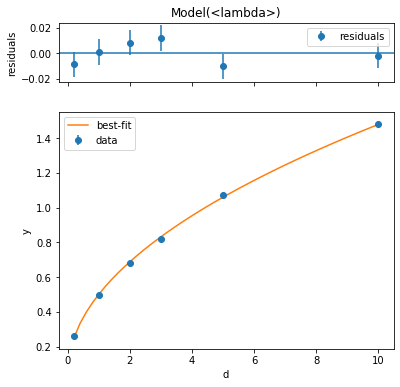

In [44]:
print(fit.fit_report())
fit.plot(numpoints=50)

Dit geeft een kleinere fout op $t_0$, een vrijwel even grote fout op $g$, maar wel een waarde die (veel) beter past bij de literatuurwaarde: $g = 9.79(20)$ m/s$^2$. Verder is $\chi_\mathrm{red}^2 = 0.993$, mooi rond de 1. We kunnen ons afvragen of het meenemen van een systematische fout in $t$ echt nodig is. Wanneer we opnieuw fitten met dezelfde geschatte waardes `guess`, waar we $t_0 = 0$ hadden gekozen, en we zetten die waarde vast:

In [45]:
guess['t0'].vary = False

dan vinden we uit de fit:

In [46]:
fit = inv_vallen.fit(data.t, d=data.d, weights = 1 / data.terr, params=guess)
print(fit.fit_report())

[[Model]]
    Model(<lambda>)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 15
    # data points      = 6
    # variables        = 1
    chi-square         = 35.1316633
    reduced chi-square = 7.02633266
    Akaike info crit   = 12.6040601
    Bayesian info crit = 12.3958195
[[Variables]]
    g:   8.86253014 +/- 0.21480671 (2.42%) (init = 1)
    t0:  0 (fixed)


een $\chi_\mathrm{red}^2 = 7.0$, en ook nog een $g = 8.86(21)$ m/s$^2$ die niet overeenkomt met de literatuurwaarde. De $\chi_\mathrm{red}^2$ geeft wel aan dat we deze fit niet kunnen vertrouwen. Er is dus vrijwel zeker een systematische fout in $t$ aanwezig, en we nemen als resultaat van onze meting de eerder gevonden waarde $g = 9.79(20)$ m/s$^2$.